## Computer Vision - Assignment 2  

#### Maggie Ezzat Gamil Gaid       T-16       37-575   
#### Mariz Samir Mounir Awad      T-12       37-2632

### Problem 1:

In [3]:
from PIL import Image
import numpy as np 
import math
import matplotlib.pyplot as plt

In [4]:
def getLOGkernel(sigma):
    
    s = 2 * math.ceil(3*sigma) + 1
    r = math.floor(s/2)
    
    kernel = np.zeros(shape=(s,s))

    for x in range(-r, r+1):
        for y in range(-r, r+1):
            
            f0 = ( (x**2) + (y**2) ) / ( 2* (sigma**2) )
            f1 = -1 / ( (math.pi) * (sigma**4) )
            f2 = 1 - f0
            f3 = math.exp(-1* (f0))
            val = (f1)*(f2)*(f3)
            kernel[x+r][y+r] = val
    
    return kernel

In [21]:
def convolve(img, kernel):
    
    conv_img = np.zeros(shape=(256,256))
    
    r = math.floor((kernel.shape[0])/2)

    for i in range (r,img.shape[0]-r):
        for j in range (r,img.shape[1]-r):
            val = 0
            for k in range(-r, r+1):
                for l in range(-r,r+1):
                    val += img[i+k][j+l]*kernel[k+r][l+r]

            conv_img[i][j] = val
    
    return conv_img

In [22]:
def get_zero_crossings(arr):
    
    zero_cross = np.zeros(arr.shape)
    
    for i in range(1, arr.shape[0]-1):
        for j in range(1, arr.shape[1]-1):
            
            if arr[i][j] >= 0:
                if arr[i][j+1]<0 or arr[i+1][j]<0 or arr[i+1][j+1]<0:    
                    zero_cross[i][j] = 255
            elif arr[i][j] <0: 
                if arr[i][j+1]>=0 or arr[i+1][j]>=0 or arr[i+1][j+1]>=0: 
                    zero_cross[i][j] = 255
                    
    return zero_cross
                

In [23]:
def applyPrewitt(img):
    
    prewitt = np.zeros(shape=(256,256), dtype=np.float64)

    for i in range (1,img.shape[0]-1):
        for j in range (1,img.shape[1]-1):
            h1 = int(img[i-1][j-1]) + int(img[i-1][j]) + int(img[i-1][j+1]) - int(img[i+1][j-1]) - int(img[i+1][j]) - int(img[i+1][j+1])
            h2 = int(img[i-1][j+1]) + int(img[i][j+1]) + int(img[i+1][j+1]) - int(img[i-1][j-1]) - int(img[i][j-1]) - int(img[i+1][j-1]) 

            prewitt[i][j] = np.float64(( (np.float64(h1))**2 + (np.float64(h2))**2 )**0.5)
    
    return prewitt

In [24]:
def applyThreshold(first_dir, zero_cross, t):
    
    out = np.zeros(shape=(256,256)).astype(int)
    
    for i in range(first_dir.shape[0]):
        for j in range(first_dir.shape[1]):
            if first_dir[i][j] >= t*255 and zero_cross[i][j] == 255:
                out[i][j]=255
            else:
                out[i][j]=0
                
    return out

In [25]:
def applyLOG(image, sigma, t=0.1):
    
    kernel = getLOGkernel(sigma)
    image = image.convert('L')
    img = np.array(image)
    
    second_der_img = convolve(img, kernel)
    zero_cross = get_zero_crossings(second_der_img)   
    first_der_img = applyPrewitt(img)
    output = applyThreshold(first_der_img, zero_cross, t)

    output_img = output.astype('uint8')
    output_img = Image.fromarray(output_img)
    return output_img

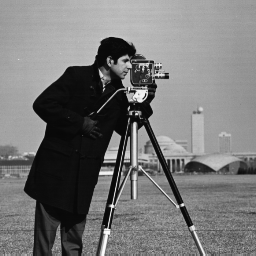

In [26]:
img = Image.open("Cameraman.tif")
img

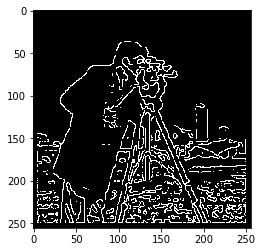

In [27]:
edges2 = applyLOG(img, 2)
plt.imshow(edges2, cmap="gray")
edges2.save('LoG_2.jpg')

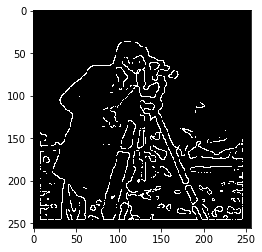

In [28]:
edges3 = applyLOG(img, 3)
plt.imshow(edges3, cmap="gray")
edges3.save('LoG_3.jpg')

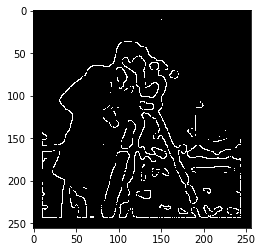

In [29]:
edges4 = applyLOG(img, 4)
plt.imshow(edges4, cmap="gray")
edges4.save('LoG_4.jpg')